In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47.0,62.0,27.0,22.0
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [5]:
train_df.shape

(891, 12)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


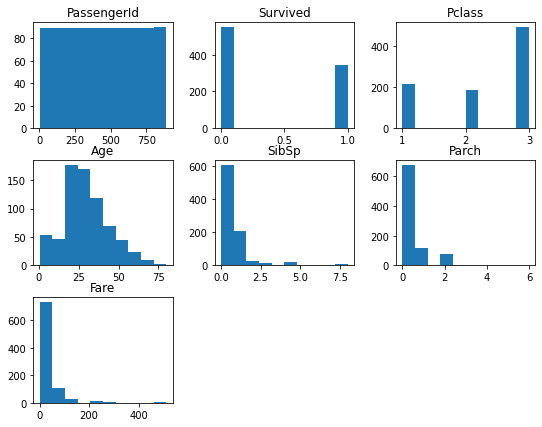

In [6]:
train_df.hist(bins=10,figsize=(9,7),grid=False);

In [7]:
test_df.shape

(418, 11)

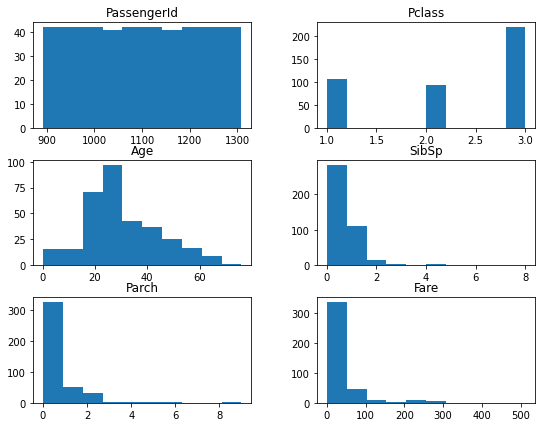

In [8]:
test_df.hist(bins=10,figsize=(9,7),grid=False);

In [9]:
train_df[train_df['Sex'].str.match("male")].Sex.count() 


577

In [10]:
train_df[train_df['Sex'].str.match("female")].Sex.count()

314

In [11]:
test_df[train_df['Sex'].str.match("male")].Sex.count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


258

In [12]:
test_df[train_df['Sex'].str.match("female")].Sex.count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


160

Text(0.5, 1.0, 'How many Men and Women in train_df')

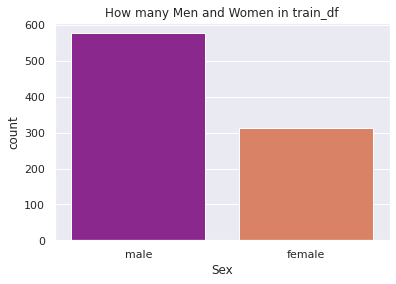

In [13]:
sns.set(font_scale=1)
sns.countplot(x='Sex',data=train_df,palette='plasma').set_title('How many Men and Women in train_df')

Text(0.5, 1.0, 'How many Men and Women in test_df')

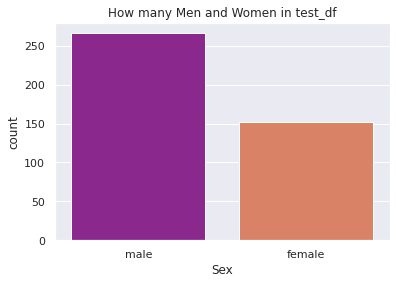

In [14]:
sns.countplot(x='Sex',data=test_df,palette='plasma').set_title('How many Men and Women in test_df')

<AxesSubplot:xlabel='Sex', ylabel='count'>

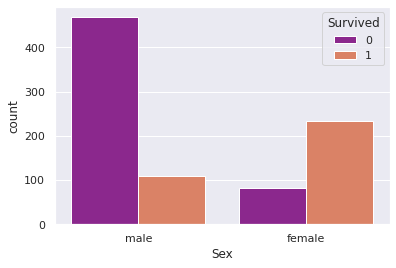

In [15]:
# Here in our plot_ 0 = Not Survived & 1 = Survived #
sns.countplot(x='Sex',data=train_df,hue='Survived',palette='plasma')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

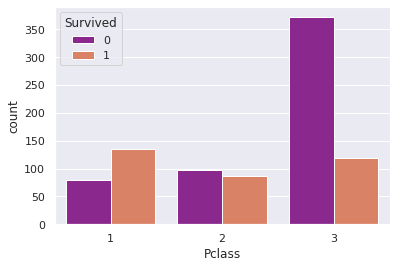

In [16]:
sns.countplot(x='Pclass',data=train_df,hue='Survived',palette='plasma')

In [17]:
#Here 0 = Not Survived & 1 = Survived #
train_df['Survived'].value_counts() *100/len(train_df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


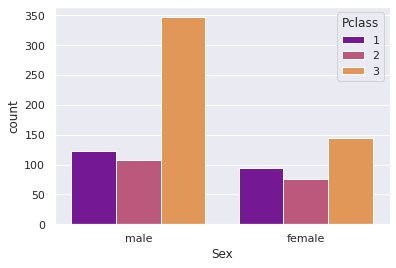

In [18]:
sns.countplot(x='Sex',data=train_df,hue='Pclass',palette='plasma')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


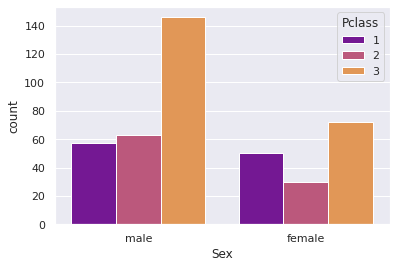

In [19]:
sns.countplot(x='Sex',data=test_df,hue='Pclass',palette='plasma')
test_df.info()

In [20]:
tm = train_df.groupby("Survived").mean()
tm
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

PassengerId    0.002971
Pclass         0.129755
Age            0.038706
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

In [21]:
train_df = train_df.drop(["PassengerId","Name","Ticket"], axis=1)

In [22]:
tm = train_df.groupby("Survived").mean()
tm
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

Pclass    0.129755
Age       0.038706
SibSp     0.077914
Parch     0.170176
Fare      0.372661
dtype: float64

In [23]:
def missingtraindata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(6,4))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="blue",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


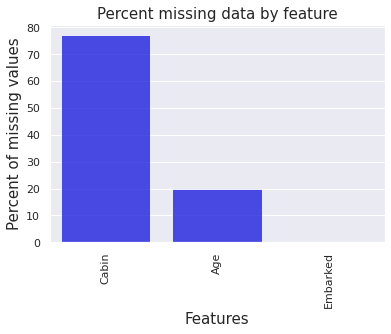

In [24]:
missingtraindata(train_df)

In [25]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
def missingtestdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(6,4))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


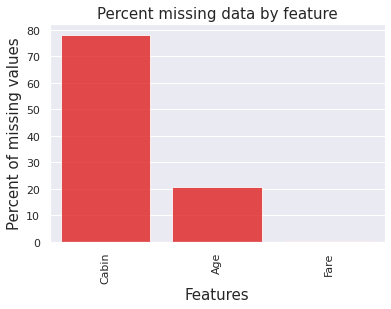

In [27]:
missingtestdata(test_df)

In [28]:
train_df["Cabin"] = train_df["Cabin"].isna()
train_df = pd.get_dummies(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


In [29]:
train_df["Age"][train_df["Age"].isna()] = train_df["Age"].mean()
train_df.count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Survived      891
Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Cabin         891
Sex_female    891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [30]:
test_df['Age'].mean()

30.272590361445783

In [31]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [32]:
test_df["Cabin"] = test_df["Cabin"].isna()
test_df = pd.get_dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 793 entries, PassengerId to Embarked_S
dtypes: bool(1), float64(2), int64(4), uint8(786)
memory usage: 341.0 KB


In [33]:
test_df.isnull().sum()

PassengerId           0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
                     ..
Ticket_W./C. 6608     0
Ticket_W.E.P. 5734    0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Length: 793, dtype: int64

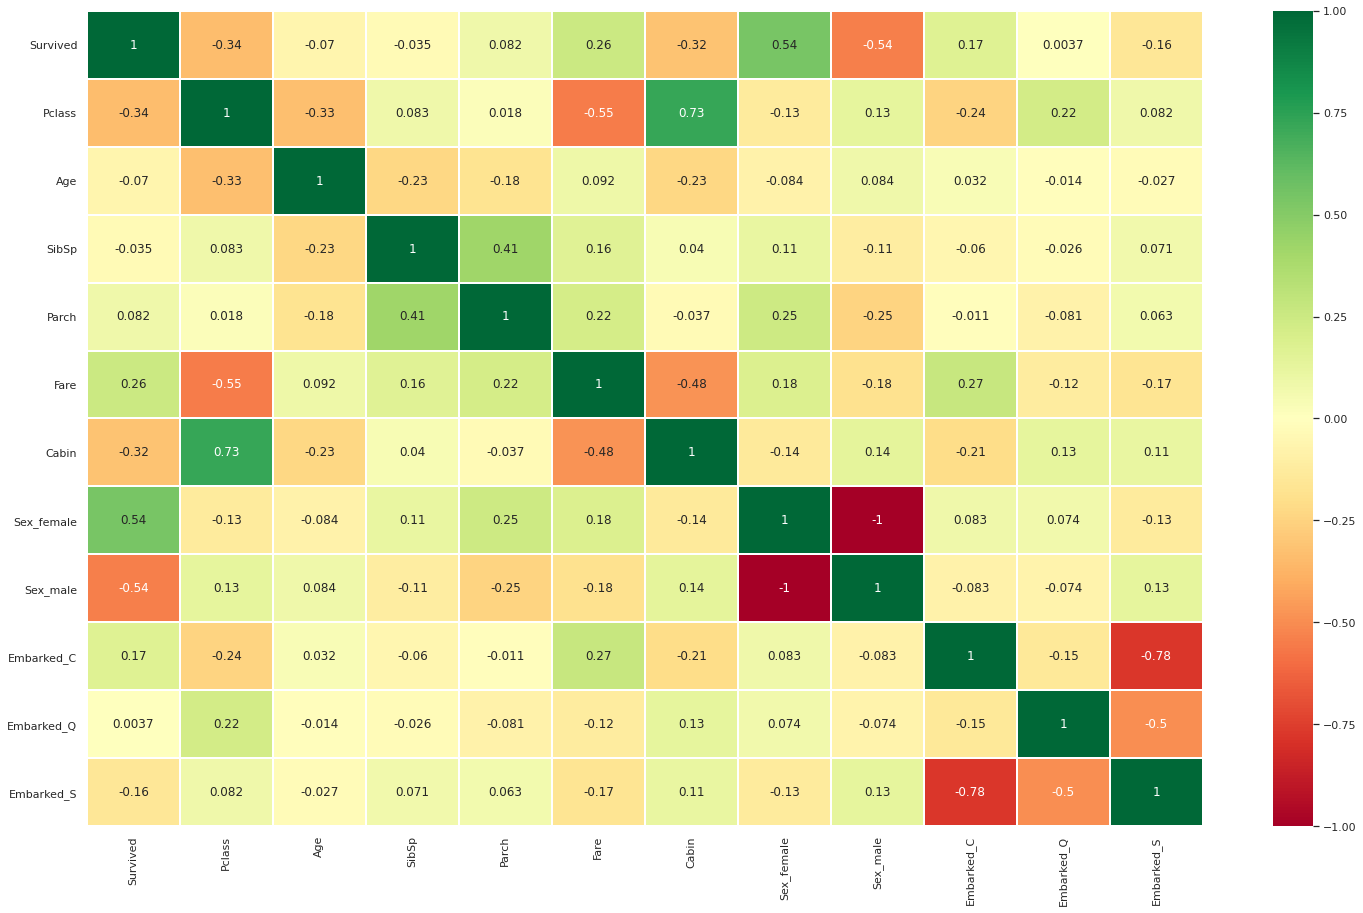

In [34]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [35]:
#import logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
#import xgboost for test purpose (Not Required)
from xgboost import XGBClassifier
import numpy as np

In [36]:
all_features = train_df.drop("Survived",axis=1)
Targeted_feature = train_df["Survived"]

In [37]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(all_features,Targeted_feature, test_size = 0.2,random_state = 10)

In [38]:
# Model Preprocessing.
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_train.shape, y_train.shape, X_test.shape


((891, 11), (891,), (179, 11))

In [39]:
# Initialize our algorithm
# logmodel = XGBClassifier()
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [41]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8435754189944135
Survived 58
NOT Survived 121


array([[105,  12],
       [ 16,  46]])

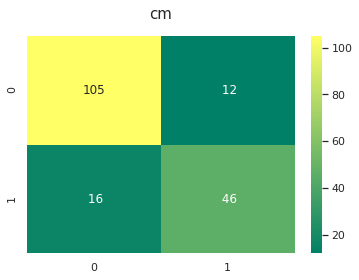

In [42]:
cm = confusion_matrix(y_test,pp)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pp),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm


In [43]:
prediction_lr=logmodel.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 84.36


In [44]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_test})
submission['Survived'] = submission['Survived'].fillna(0)
submission['PassengerId'] = submission['PassengerId'].fillna(0)
submission

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0
...,...,...
851,0.0,0.0
861,0.0,0.0
870,0.0,0.0
876,0.0,0.0
